## Importing the Libraries

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# Enable offline mode for Plotly
py.init_notebook_mode(connected=True)
cf.go_offline()
sns.set(style="darkgrid")

In [37]:
df = pd.read_csv("online_course_engagement_data.csv")
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


## Meta Information

In [38]:
#check the rows and columns number.
print(f"number of rows: {df.shape[0]} and number of columns: {df.shape[1]}")

number of rows: 9000 and number of columns: 9


In [39]:
df.columns

Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion'],
      dtype='object')

## Feature Selection

In [40]:
# drop the UserID col.
df = df.drop(columns=['UserID'])

## Handling missing values

In [41]:
#check for missing values 
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
CourseCategory,0,0.0
TimeSpentOnCourse,0,0.0
NumberOfVideosWatched,0,0.0
NumberOfQuizzesTaken,0,0.0
QuizScores,0,0.0
CompletionRate,0,0.0
DeviceType,0,0.0
CourseCompletion,0,0.0


No Missing values found!!!

## Checking for duplicate rows

In [42]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 877


In [43]:
# Dropping duplicates but keeping the first occurrence
df = df.drop_duplicates(keep='first')

In [44]:
#check for dublicated rows
print("Numbers of duplicated rows after removing :",df.duplicated().sum())

Numbers of duplicated rows after removing : 0


## Encoding the Categorical columns

In [45]:
df.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [46]:
cat_col =["CourseCategory","DeviceType","CourseCompletion"]

In [47]:
# Check the unique class for each column
for column in df[cat_col]:
    print(f"{column}: {df[column].unique()}")
    print()

CourseCategory: ['Health' 'Arts' 'Science' 'Programming' 'Business']

DeviceType: [1 0]

CourseCompletion: [0 1]



In [53]:
le = LabelEncoder()

for col in cat_col:
    df[col] = le.fit_transform(df[col])

print(df)

      CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0                  2          29.979719                     17   
1                  0          27.802640                      1   
2                  0          86.820485                     14   
3                  4          35.038427                     17   
4                  3          92.490647                     16   
...              ...                ...                    ...   
8995               2          37.445225                     14   
8996               4          48.631443                      7   
8997               2          38.212512                      3   
8998               2          70.048665                     13   
8999               2          93.589781                      7   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                        3   50.365656       20.860773           1   
1                        5   62.615970       65.632415           1 

In [55]:
df.sample(10)

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
2583,1,76.675611,8,3,60.409291,49.893290,1,0
4117,4,85.296960,11,6,75.041048,57.716250,0,1
7669,2,2.013152,19,5,73.059780,9.156635,1,0
3820,1,36.950126,16,4,93.852272,24.911440,0,1
2238,4,5.003444,15,5,78.182068,65.045910,1,1
2979,3,41.666932,1,0,70.133911,45.991328,0,0
7077,0,88.922684,11,7,86.194191,13.159923,1,1
7715,4,15.165058,6,4,93.494421,37.120753,0,0
92,0,60.934637,20,9,81.585605,29.001884,1,1
772,4,75.585423,20,5,75.115898,26.015286,0,1


## Statistical Information

In [60]:
df.describe()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,2.011572,50.607728,10.148098,5.166933,75.091084,51.190873,0.500431,0.439247
std,1.407271,28.364184,5.987972,3.132108,14.339876,29.069716,0.500031,0.496326
min,0.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,1.000000,26.114631,5.000000,2.000000,62.791226,26.276765,0.000000,0.000000
50%,2.000000,50.316921,10.000000,5.000000,75.273913,51.581186,1.000000,0.000000
75%,3.000000,75.377730,15.000000,8.000000,87.497542,76.729629,1.000000,1.000000
max,4.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [61]:
#check the correlation between target and each of columns
df.corr()["CourseCompletion"]

CourseCategory          -0.003048
TimeSpentOnCourse        0.186399
NumberOfVideosWatched    0.239476
NumberOfQuizzesTaken     0.291650
QuizScores               0.304706
CompletionRate           0.328800
DeviceType               0.008663
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

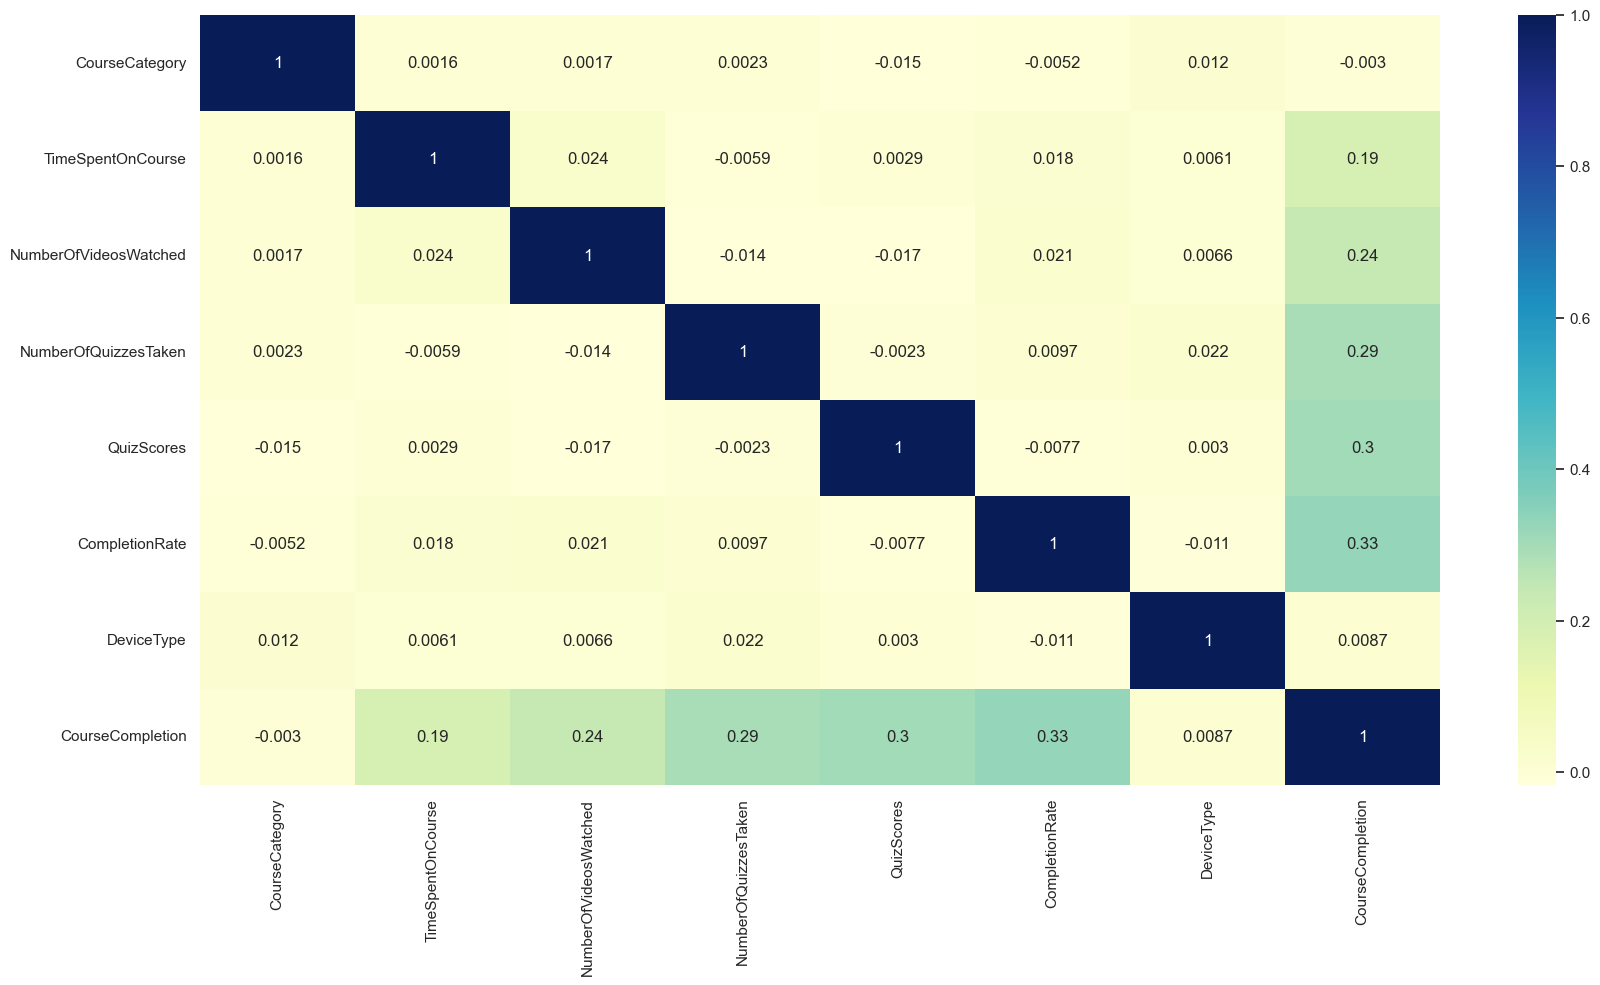

In [62]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linecolor='black');

## EDA on Numerical Columns

In [63]:
df.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0


In [64]:
numeric_col=["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]

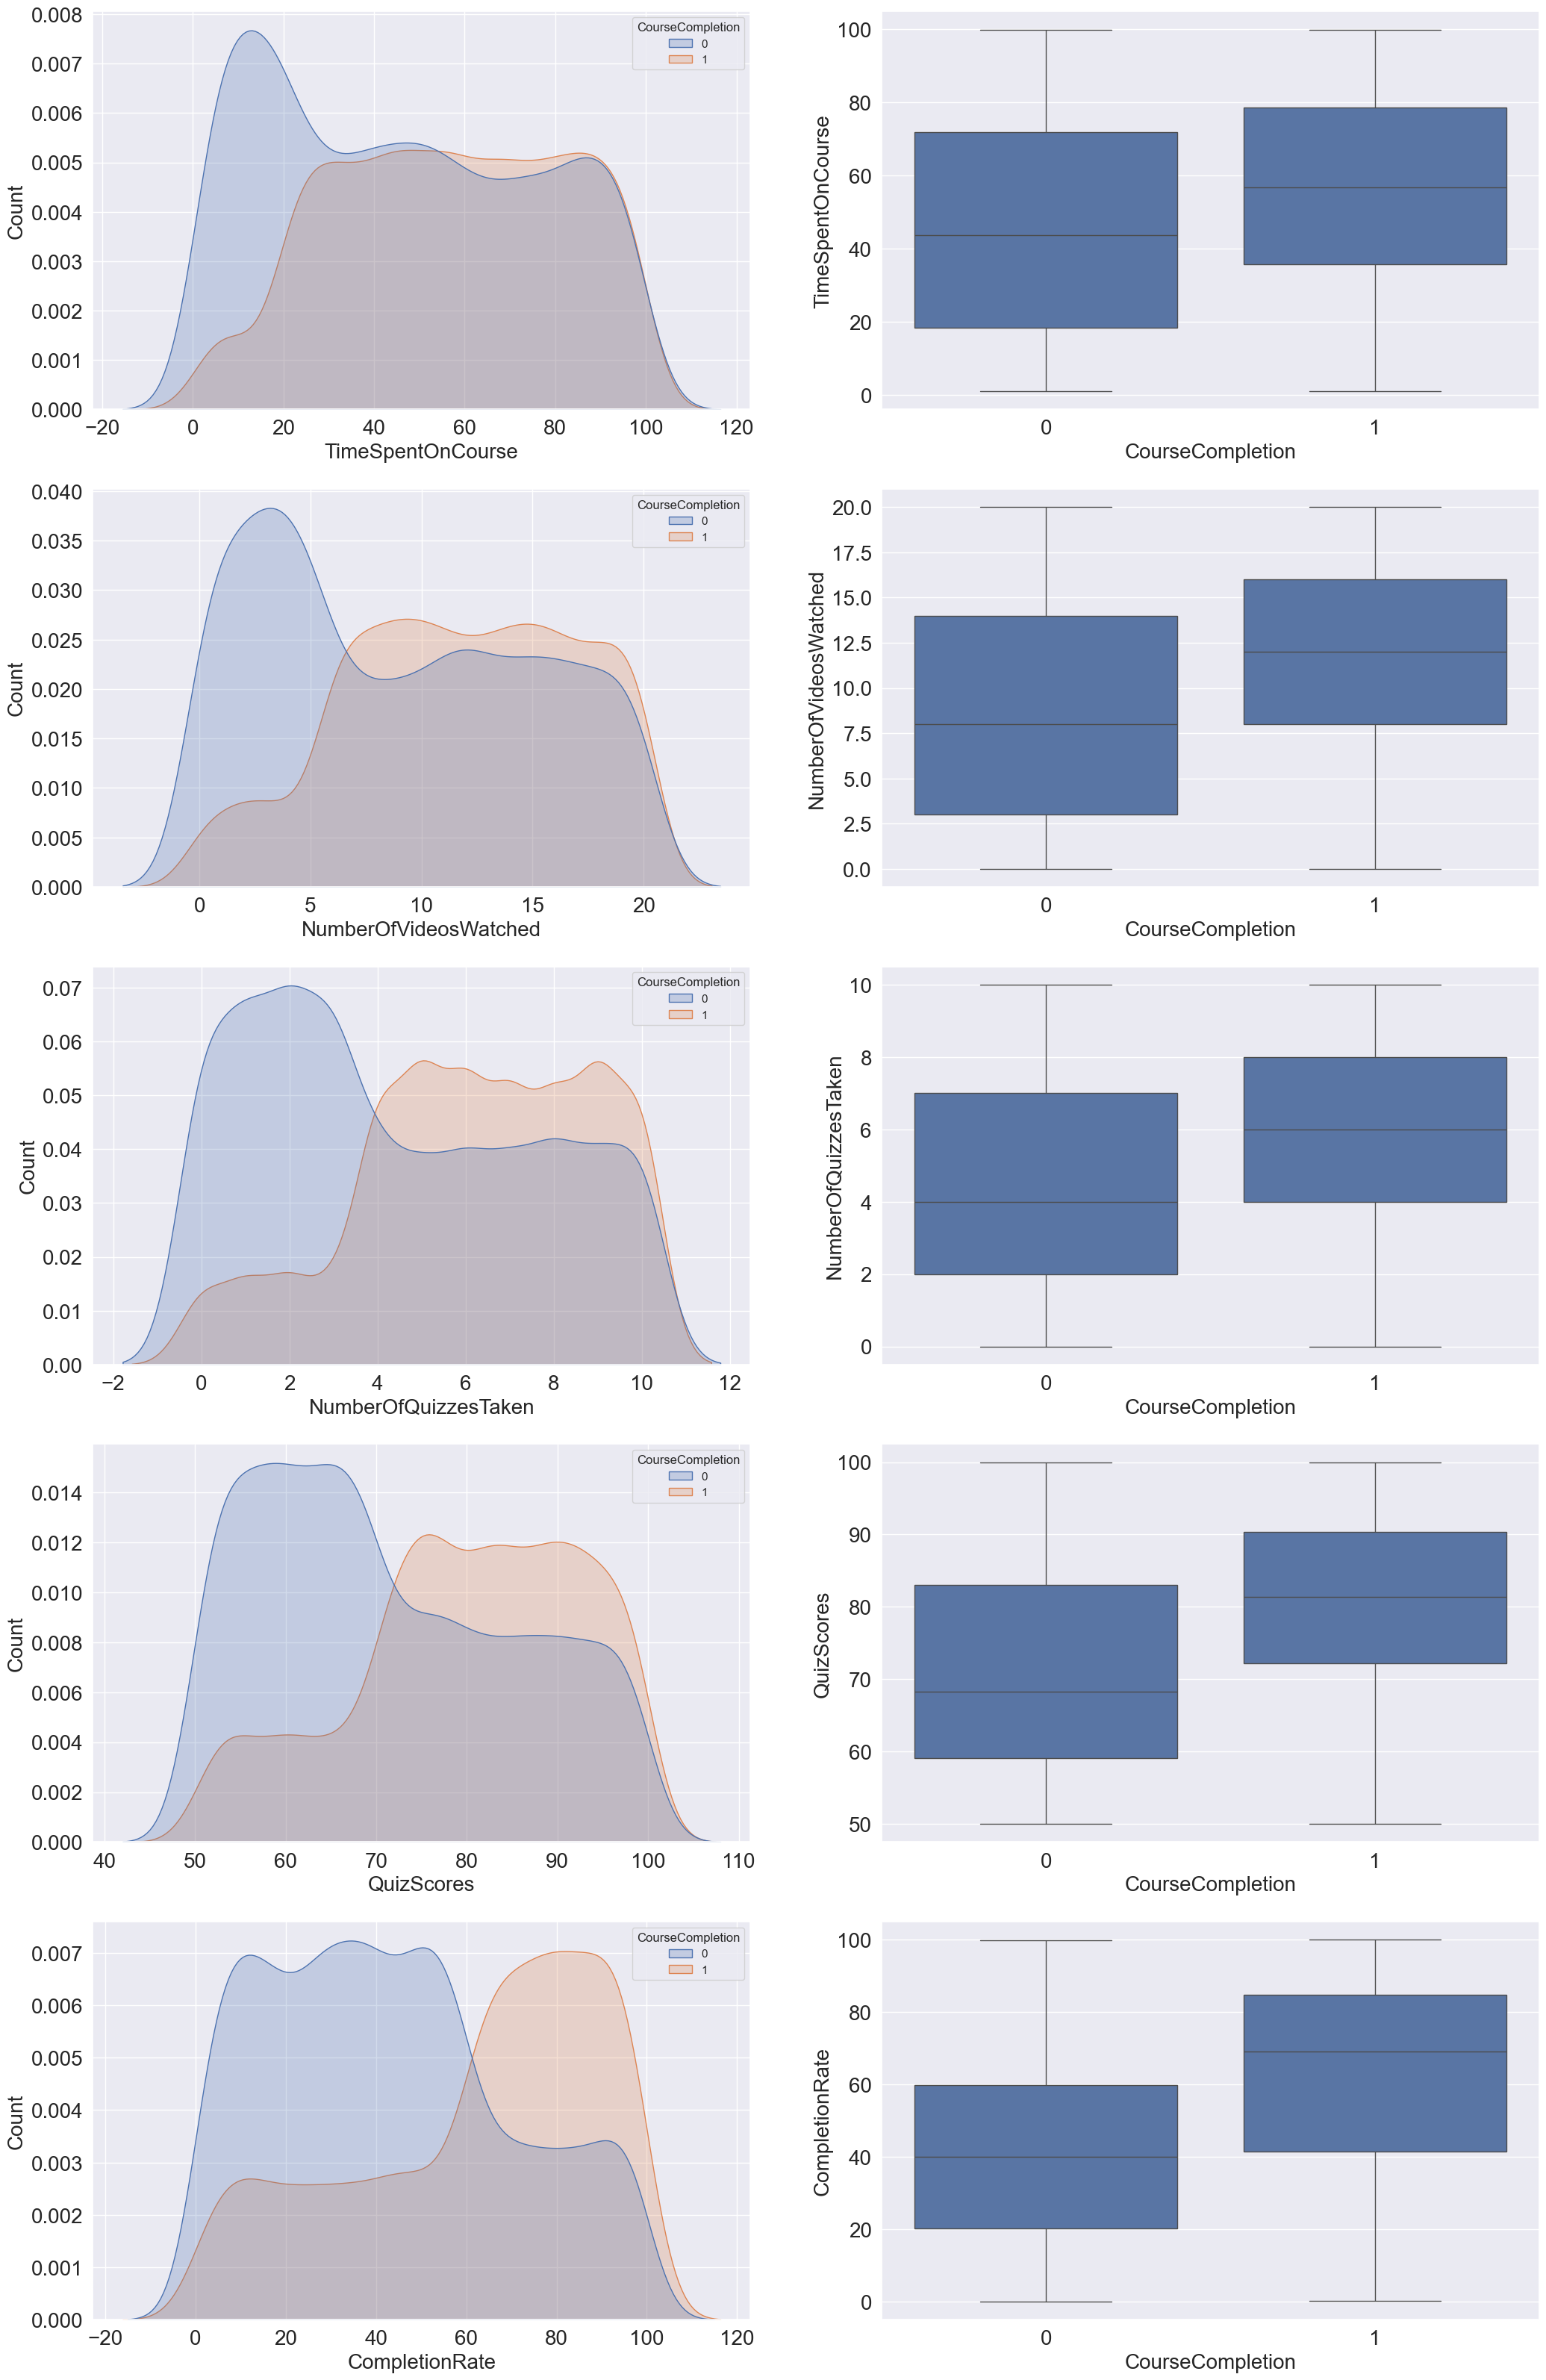

In [65]:
i = 1
plt.figure(figsize=(25, 90))

for col in numeric_col:
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df, hue="CourseCompletion", x=col, fill=True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    i = i + 1
    
    plt.subplot(11, 2, i)
    sns.boxplot(x="CourseCompletion", y=col, data=df)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("CourseCompletion", fontsize=20)
    plt.ylabel(col, fontsize=20)
    i = i + 1

plt.show()

## EDA on Target Column

In [66]:
pd.DataFrame(df['CourseCompletion'].value_counts()).rename({"CourseCompletion":"Counts"}, axis = 1).rename_axis("CourseCompletion")

,count
CourseCompletion,
0,4555
1,3568


## Training and Testing the data

In [67]:
X=df.iloc[:,0:-1]
y=df.CourseCompletion

In [68]:
#It is a good practise to split the data to avoiding the data leakage 
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (6498, 7)
X_test shape:  (1625, 7)

Y_train shape:  (6498,)
Y_test shape:  (1625,)


## Scaling the columns

In [69]:
# Using standard scaler
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType
0,-1.411617,-1.485071,0.314404,-1.337705,0.198678,1.617997,-0.993863
1,0.713330,-0.467131,-0.355266,0.261399,0.496907,0.761615,1.006175
2,0.713330,-0.249802,-0.187849,0.581219,0.457444,-1.302491,1.006175
3,0.005014,-1.413606,0.314404,-1.337705,-0.062470,0.473777,1.006175
4,1.421646,0.707128,-0.187849,1.220861,-0.347259,-1.158589,1.006175


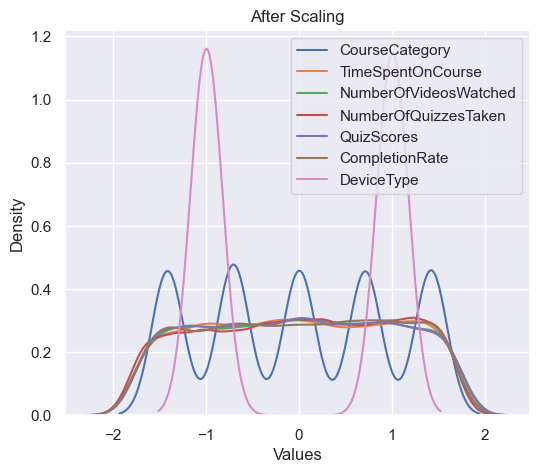

In [70]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

## Model Selection

In [71]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

def models_score(models, X_train, X_test, y_train, y_test):    
    scores = {}
    test_scores = {}
    train_scores = {}
    precision = {}
    recall = {}
    f1 = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        # Storing scores
        test_scores[name] = accuracy_score(y_test, y_pred)
        train_scores[name] = accuracy_score(y_train, y_pred_train)
        precision[name] = precision_score(y_test, y_pred, average='weighted')
        recall[name] = recall_score(y_test, y_pred, average='weighted')
        f1[name] = f1_score(y_test, y_pred, average='weighted')
        
        # Printing the model name and accuracy
        print(f"Model name: {name}")
        print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
        
        # Printing classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        

        print(f"Precision: {precision[name]}, Recall: {recall[name]}, F1 Score: {f1[name]}\n")
        print()
        
        # Plotting the confusion matrix
        print("Confusion Matrix:")
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{name} Confusion Matrix")
        plt.show()
        
        # Plotting ROC curve for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = len(set(y_test))

        # Compute ROC curve and ROC area for each class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure(figsize=(6, 4))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        
        print("\n<<<<------------------------------------------------------------->>>>\n")
    
    # Consolidating scores into a DataFrame
    model_scores = pd.DataFrame({
        'Test Accuracy': test_scores,
        'Train Accuracy': train_scores,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    return model_scores

In [72]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradiantBoost": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XgBoost": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

Model name: LogisticRegression
Train Accuracy: 0.7900892582333026
Test Accuracy: 0.7938461538461539

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       894
           1       0.79      0.75      0.76       731

    accuracy                           0.79      1625
   macro avg       0.79      0.79      0.79      1625
weighted avg       0.79      0.79      0.79      1625

Precision: 0.7935066138602356, Recall: 0.7938461538461539, F1 Score: 0.7932595492947332


Confusion Matrix:


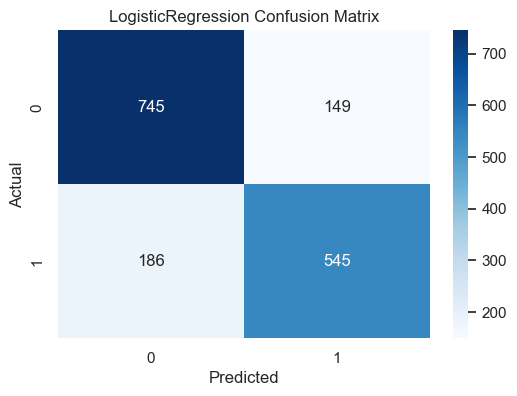

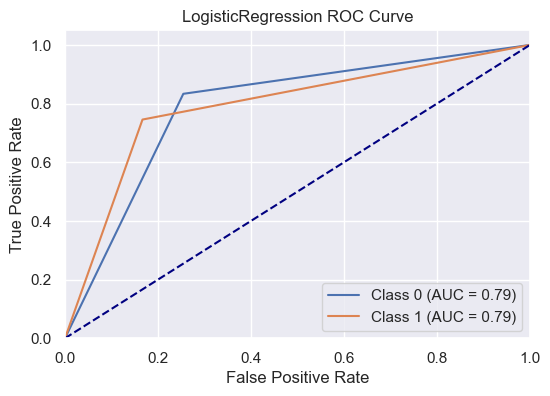


<<<<------------------------------------------------------------->>>>

Model name: SVC
Train Accuracy: 0.8881194213604185
Test Accuracy: 0.8713846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       894
           1       0.89      0.82      0.85       731

    accuracy                           0.87      1625
   macro avg       0.87      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625

Precision: 0.8724375915270458, Recall: 0.8713846153846154, F1 Score: 0.8707345256018766


Confusion Matrix:


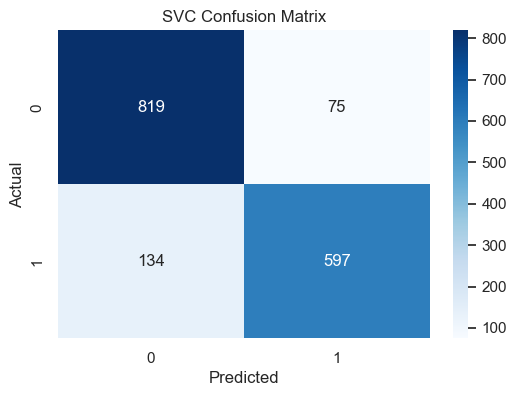

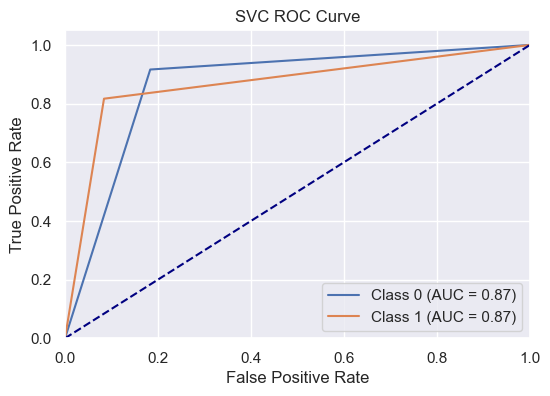


<<<<------------------------------------------------------------->>>>

Model name: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 0.9113846153846153

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       894
           1       0.90      0.91      0.90       731

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Precision: 0.9116072606493678, Recall: 0.9113846153846153, F1 Score: 0.9114459529981919


Confusion Matrix:


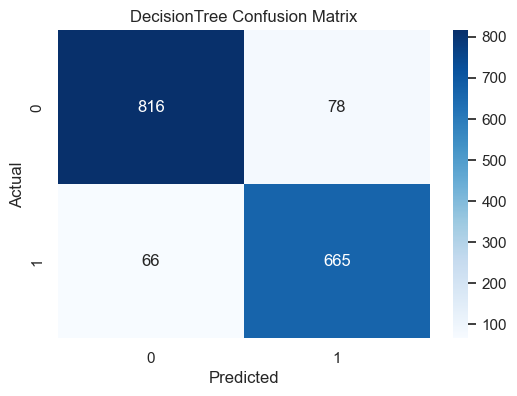

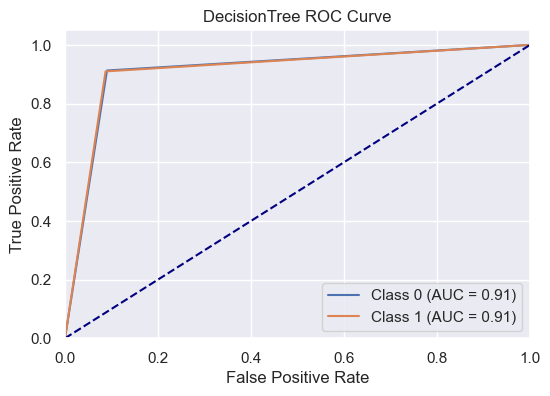


<<<<------------------------------------------------------------->>>>

Model name: AdaBoost
Train Accuracy: 0.9526008002462296
Test Accuracy: 0.9538461538461539

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       894
           1       0.96      0.93      0.95       731

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Precision: 0.9540826922247546, Recall: 0.9538461538461539, F1 Score: 0.9537703887054565


Confusion Matrix:


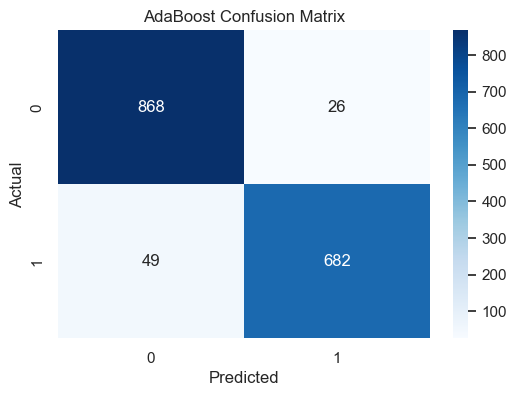

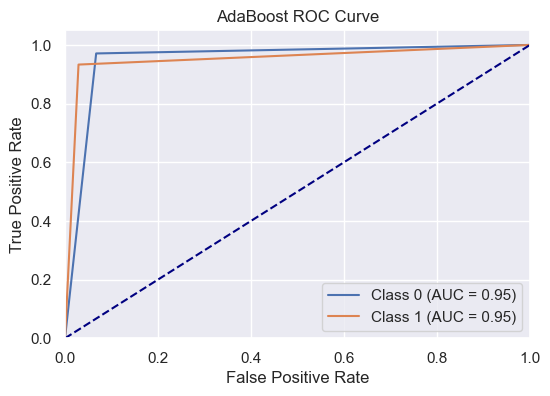


<<<<------------------------------------------------------------->>>>

Model name: GradiantBoost
Train Accuracy: 0.9590643274853801
Test Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precision: 0.9603814406277762, Recall: 0.96, F1 Score: 0.9599212140409481


Confusion Matrix:


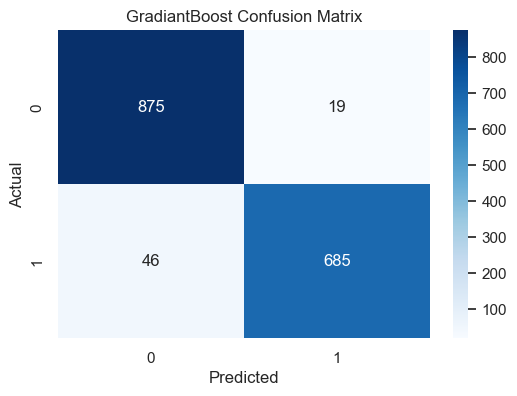

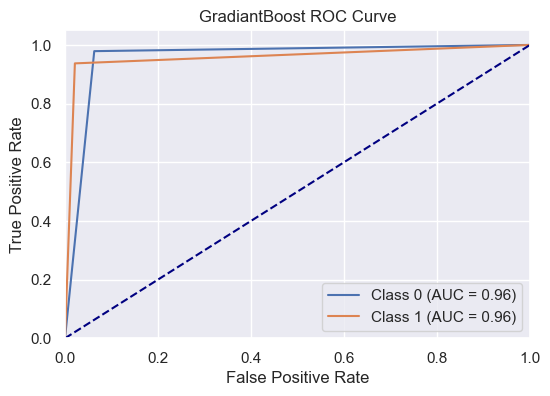


<<<<------------------------------------------------------------->>>>

Model name: RandomForest
Train Accuracy: 0.9998461064943059
Test Accuracy: 0.9587692307692308

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.93      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precision: 0.9592142925490703, Recall: 0.9587692307692308, F1 Score: 0.9586810610320402


Confusion Matrix:


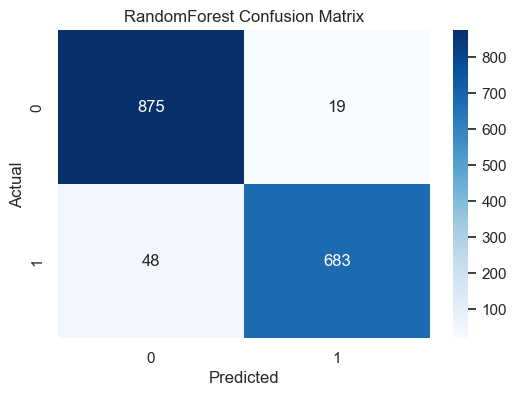

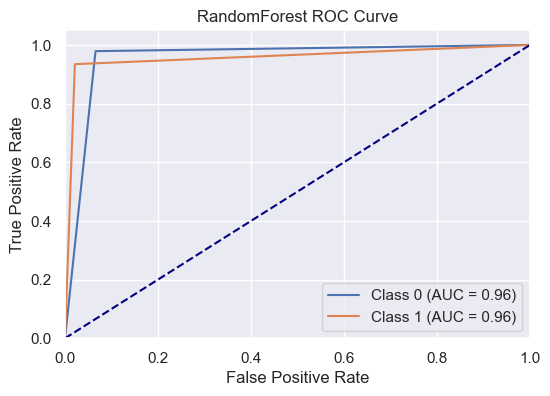


<<<<------------------------------------------------------------->>>>

Model name: XgBoost
Train Accuracy: 0.9955370883348723
Test Accuracy: 0.9569230769230769

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precision: 0.9571987657718584, Recall: 0.9569230769230769, F1 Score: 0.9568488809314459


Confusion Matrix:


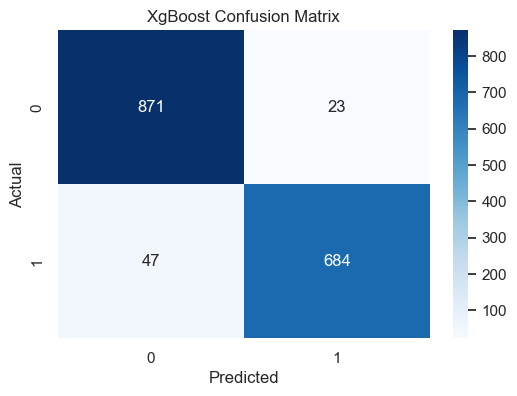

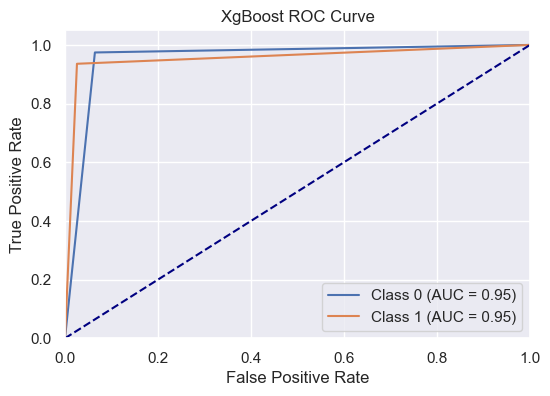


<<<<------------------------------------------------------------->>>>

Model name: KNeighborsClassifier
Train Accuracy: 0.904586026469683
Test Accuracy: 0.8633846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       894
           1       0.86      0.83      0.85       731

    accuracy                           0.86      1625
   macro avg       0.86      0.86      0.86      1625
weighted avg       0.86      0.86      0.86      1625

Precision: 0.8632782578991828, Recall: 0.8633846153846154, F1 Score: 0.8631712848845446


Confusion Matrix:


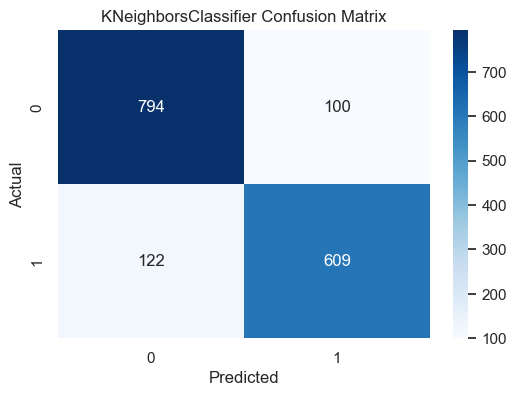

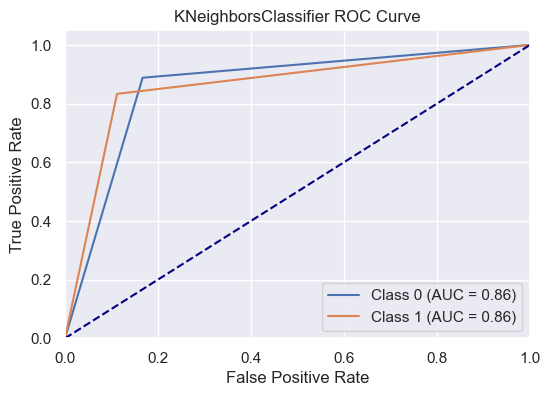


<<<<------------------------------------------------------------->>>>



In [73]:
# Call the function to evaluate models
scores = models_score(models, x_train, x_test, y_train, y_test)

In [74]:
scores

,Test Accuracy,Train Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.793846,0.790089,0.793507,0.793846,0.793260
SVC,0.871385,0.888119,0.872438,0.871385,0.870735
DecisionTree,0.911385,1.000000,0.911607,0.911385,0.911446
AdaBoost,0.953846,0.952601,0.954083,0.953846,0.953770
GradiantBoost,0.960000,0.959064,0.960381,0.960000,0.959921
RandomForest,0.958769,0.999846,0.959214,0.958769,0.958681
XgBoost,0.956923,0.995537,0.957199,0.956923,0.956849
KNeighborsClassifier,0.863385,0.904586,0.863278,0.863385,0.863171
